# REST API

The goal of this assignment is to gather data about Nobel Prizes in physics using the Nobel Prize REST API. The information will be obtained in JSON format, and the API documentation provides guidance on how to format requests and understand the returned data. The JSON response should align with the structure outlined in the documentation.

In [ ]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup

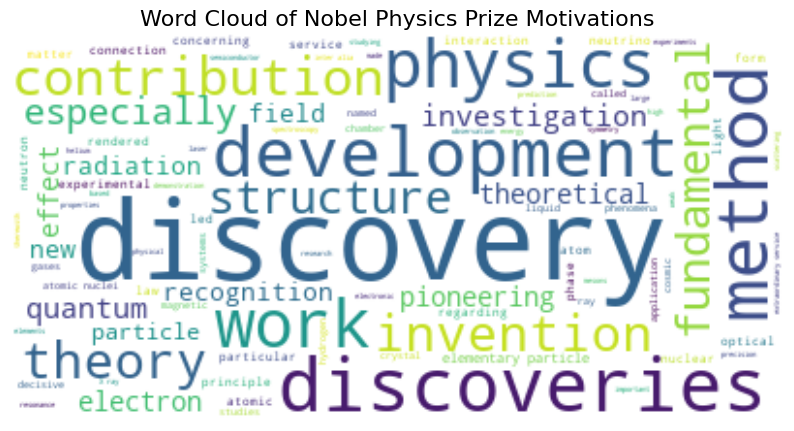

In [20]:

# Define the Nobel Prize API endpoint
URI = 'http://api.nobelprize.org/2.0/nobelPrizes?limit=200&nobelPrizeYear=1901&yearTo=2024&nobelPrizeCategory=phy'

# Fetch data from the API
response = requests.get(URI)
data = response.json()  # Parse JSON response

# Initialize an empty string to store motivations
motivation = ''

# Loop through each Nobel Prize entry
for i in range(len(data['nobelPrizes'])):
    if 'laureates' in data['nobelPrizes'][i]:
        # Safely extract the motivation text for each laureate
        motivation += f"{data['nobelPrizes'][i]['laureates'][0]['motivation']['en']} "

# Create a word cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=100).generate(motivation)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Nobel Physics Prize Motivations', fontsize=16)
plt.show()


# Web scraping

The objective of this task is to build a web scraper to extract data from https://books.toscrape.com/ and generate a structured table by gathering detailed information from each book's individual webpage.

In [19]:
# Lists to store the scraped data
titles = []
ratings = []
prices = []
upcs = []

# Loop through the first 3 pages
for i in range(3):
    page_url = f'https://books.toscrape.com/catalogue/page-{i+1}.html'
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all books on the page
    books = soup.find('ol').find_all('li')
    
    for book in books:
        # Navigate to the detail page for each book
        detail_url = f"https://books.toscrape.com/catalogue/{book.h3.a['href']}"
        detail_response = requests.get(detail_url)
        detail_soup = BeautifulSoup(detail_response.content, 'html.parser')
        
        # Extract data from the detail page
        title = detail_soup.find('h1').text
        price = detail_soup.find('p', class_='price_color').text
        rating = detail_soup.find('p', class_='star-rating')['class'][1]
        upc = detail_soup.find('table', class_='table table-striped').find('td').text
        
        # Append data to respective lists
        titles.append(title)
        prices.append(price)
        ratings.append(rating)
        upcs.append(upc)

# Create a DataFrame
data = {'upc': upcs, 'title': titles, 'price': prices, 'rating': ratings}
df = pd.DataFrame(data)

# Display the first few rows
df.head()

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,£51.77,Three
1,90fa61229261140a,Tipping the Velvet,£53.74,One
2,6957f44c3847a760,Soumission,£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five


The table displays information about books, including their unique UPC, title, price, and customer rating, providing a structured summary of the data scraped from the website.